# Emotion Detection Training File

In [3]:
## required imports
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy

In [4]:
## set parameters for images used in training
IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32

In [5]:
#define locations of emotion datasets
train_data_dir="emotion_data/train/"
validation_data_dir="emotion_data/test/"

In [6]:
## define the image data generators for training and testing

train_datagen = ImageDataGenerator(
    rescale=1./255,
	rotation_range=30,
    shear_range=0.3,
	zoom_range=0.3,
	horizontal_flip=True,
	fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator= validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


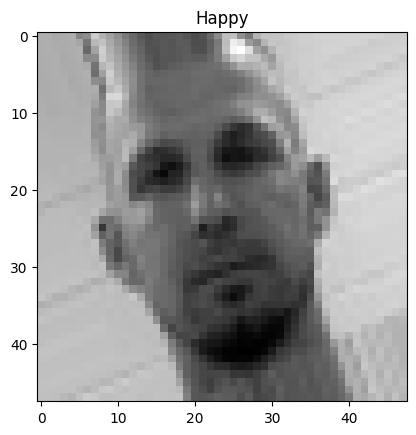

In [7]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

# Creating the Model

In [31]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [32]:
## identify number of total images are in traing and testing files
train_path = 'emotion_data/train/'
test_path = 'emotion_data/test/'

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


In [33]:
#fit the model and save it to exteral file 
epochs=50

history=model.fit(train_generator,
                  steps_per_epoch=num_train_imgs//batch_size,
                  epochs=epochs,
                  validation_data=validation_generator,
                  validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_modell_100epochs.h5')


Epoch 1/50
897/897 [==============================] - 224s 249ms/step - loss: 1.7761 - accuracy: 0.2664 - val_loss: 1.7077 - val_accuracy: 0.3283
Epoch 2/50
897/897 [==============================] - 88s 98ms/step - loss: 1.6615 - accuracy: 0.3320 - val_loss: 1.4766 - val_accuracy: 0.4220
Epoch 3/50
897/897 [==============================] - 87s 97ms/step - loss: 1.5428 - accuracy: 0.3940 - val_loss: 1.3895 - val_accuracy: 0.4551
Epoch 4/50
897/897 [==============================] - 89s 99ms/step - loss: 1.4651 - accuracy: 0.4322 - val_loss: 1.3284 - val_accuracy: 0.4886
Epoch 5/50
897/897 [==============================] - 88s 98ms/step - loss: 1.4093 - accuracy: 0.4542 - val_loss: 1.2862 - val_accuracy: 0.4944
Epoch 6/50
897/897 [==============================] - 89s 99ms/step - loss: 1.3661 - accuracy: 0.4768 - val_loss: 1.2134 - val_accuracy: 0.5322
Epoch 7/50
897/897 [==============================] - 88s 98ms/step - loss: 1.3317 - accuracy: 0.4908 - val_loss: 1.2097 - val_accurac

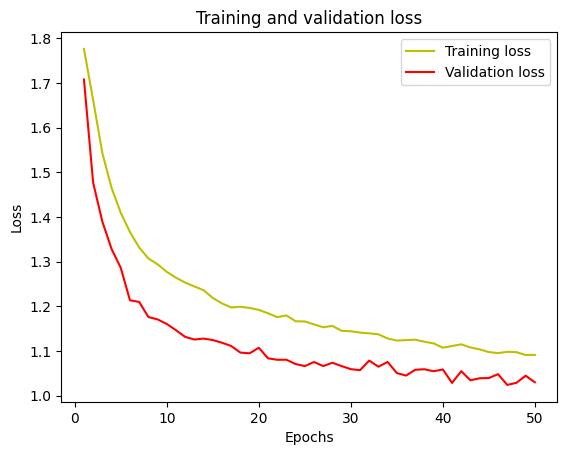

In [34]:
#check the validation anf training loss over each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']


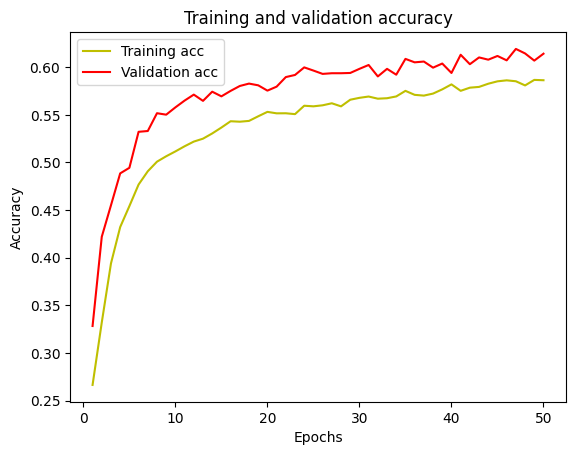

In [37]:
#check the validation anf training accuracy over each epoch
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test the Model

In [8]:
from keras.models import load_model

# test the model
my_model = load_model('emotion_detection_modell_100epochs.h5', compile=False)

In [9]:
#generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(test_labels,predictions))

1/1 [==============================] - 0s 116ms/step
Accuracy =  0.59375


<Axes: >

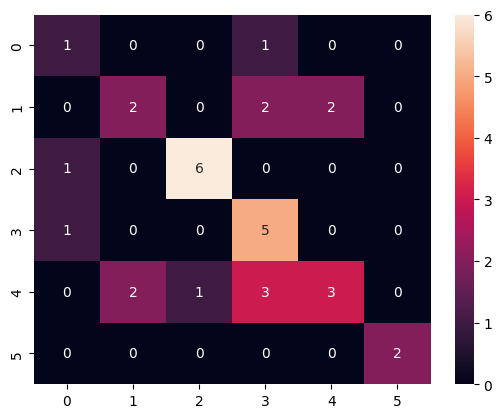

In [10]:
#confusion matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

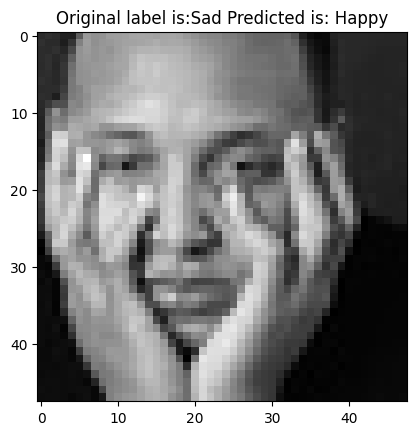

In [19]:
#check results on a few images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()